# SALES DATA ANALYSIS

**Goal:** Use sales data analysis to find patterns, best-selling items, and revenue indicators to help in business decision-making.

**PROJECT OBJECTIVES:**
    
This project will require you to delve into a sizable sales dataset in order to glean insightful information. In order
to successfully convey your findings, you will compute revenue measures like

1. total sales.
2. analyze sales trends over time.
3. determine the best-selling products, and build visualizations.

# Sales Data Importing

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
d=pd.read_excel("ECOMM DATA.xlsx")

In [14]:
d.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Data Cleaning and preprocessing

In [15]:
# Check for missing values
print(d.isnull().sum())


# Drop rows with missing values (if any)
d.dropna(inplace=True)

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


# Total Sales

In [16]:
# Compute total sales
total_sales = d['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

# Compute total profit
total_profit = d['Profit'].sum()
print(f"Total Profit: ${total_profit:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02


# Analyzing Sales and trends over time

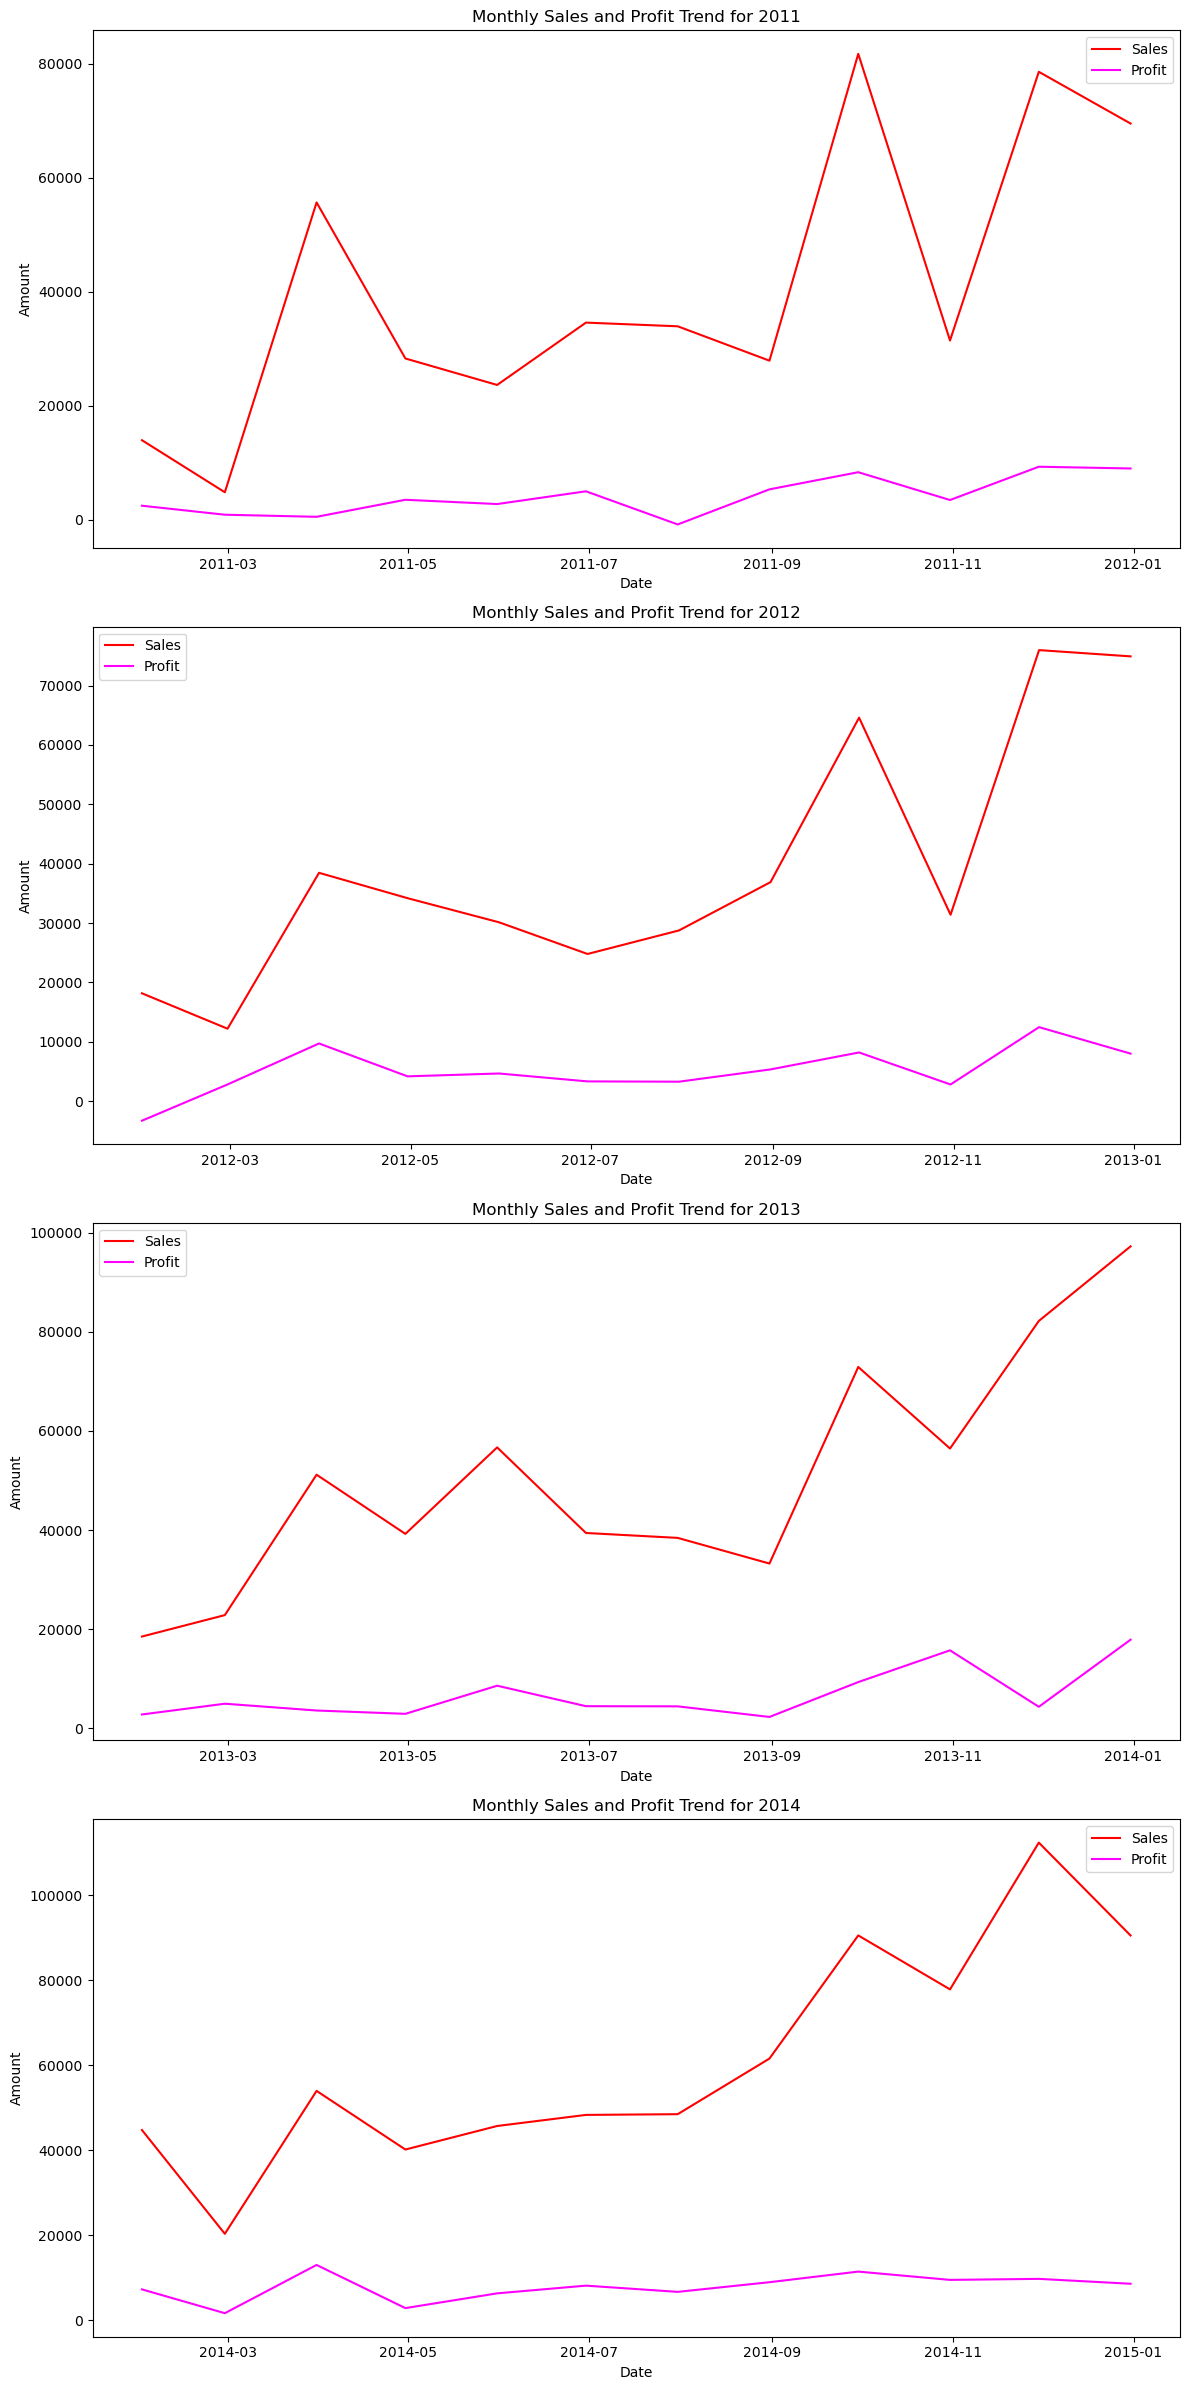

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your date column is in datetime format
d['Order Date'] = pd.to_datetime(d['Order Date'])

# Set the order date column as the index
d.set_index('Order Date', inplace=True)

# Resample the data by month and sum the sales and profit
monthly_sales = d['Sales'].resample('M').sum()
monthly_profit = d['Profit'].resample('M').sum()

# Get the unique years from the data
years = monthly_sales.index.year.unique()

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)))

# Plot the sales and profit trends for each year separately
for i, year in enumerate(years):
    # Filter data for the current year
    sales_year = monthly_sales[monthly_sales.index.year == year]
    profit_year = monthly_profit[monthly_profit.index.year == year]
    
    # Plot sales and profit
    axes[i].plot(sales_year.index, sales_year, label='Sales', color="red")
    axes[i].plot(profit_year.index, profit_year, label='Profit', color="magenta")
    axes[i].set_title(f'Monthly Sales and Profit Trend for {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Amount')
    axes[i].legend()

plt.tight_layout()
plt.show()


# Determining the best selling and most profitable products

Top 10 Best-Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64
Top 10 Most Profitable Products:
Produc

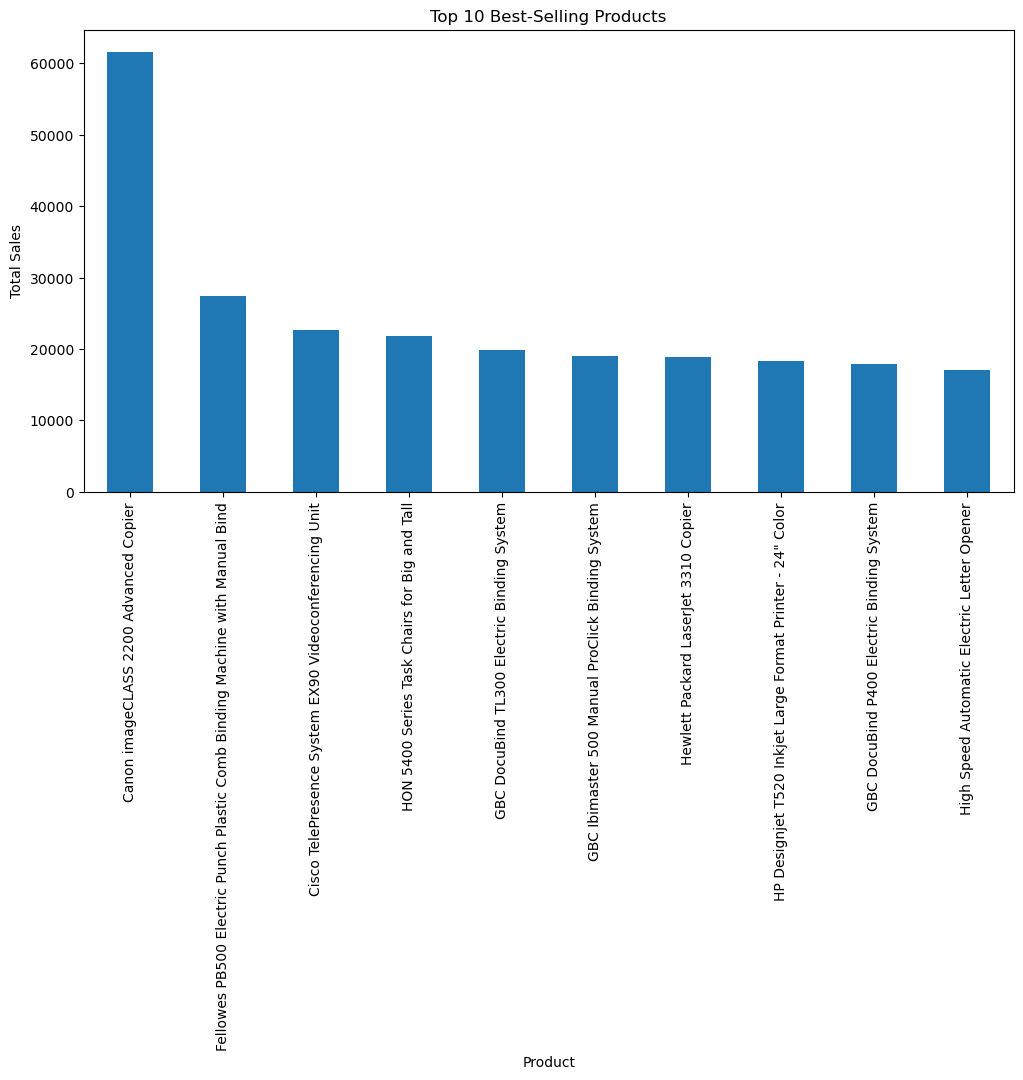

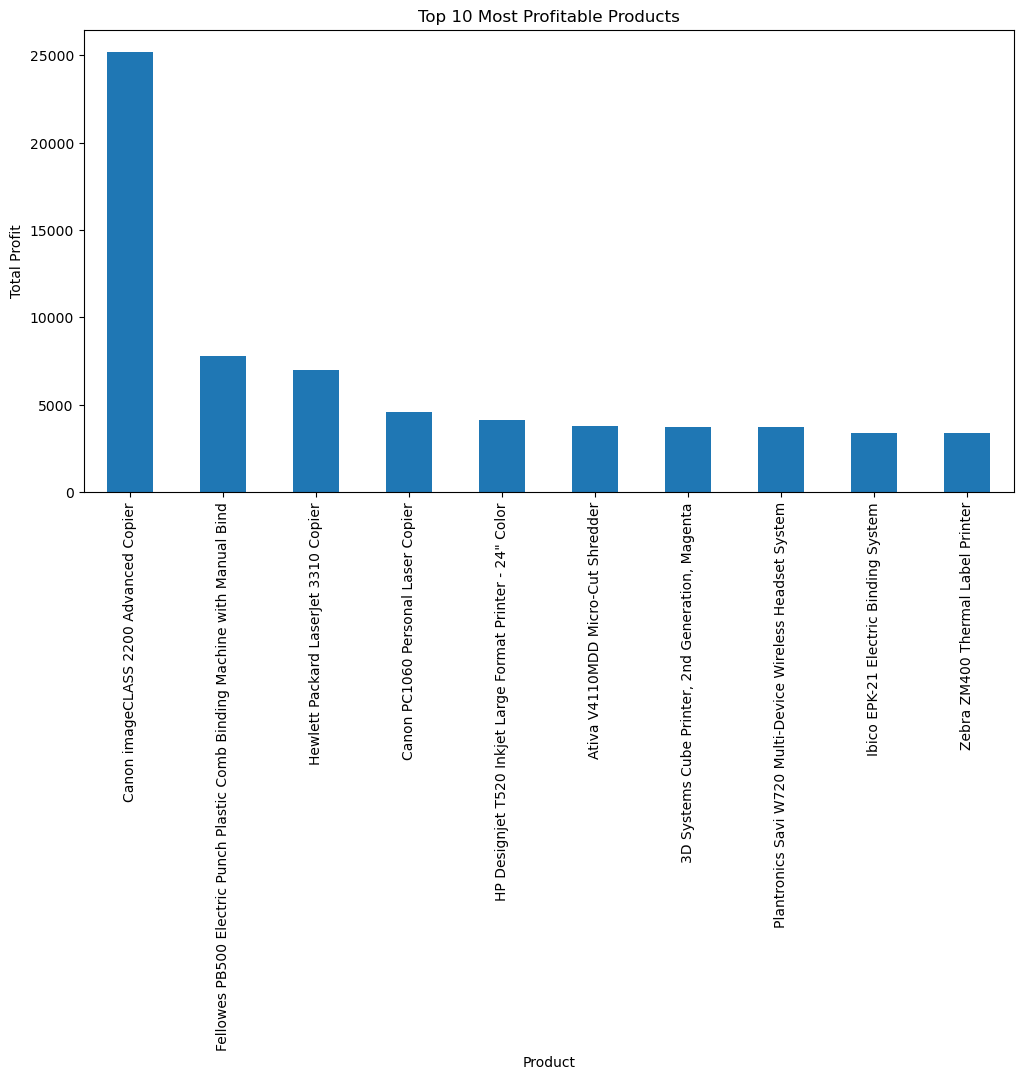

In [18]:
# Group by product and sum the sales and profit
product_sales = d.groupby('Product Name')['Sales'].sum()
product_profit = d.groupby('Product Name')['Profit'].sum()

# Sort the products by total sales and profit in descending order
best_selling_products = product_sales.sort_values(ascending=False)
most_profitable_products = product_profit.sort_values(ascending=False)

# Display the top 10 best-selling products
print("Top 10 Best-Selling Products:")
print(best_selling_products.head(10))

# Display the top 10 most profitable products
print("Top 10 Most Profitable Products:")
print(most_profitable_products.head(10))

# Plot the top 10 best-selling products
plt.figure(figsize=(12, 6))
best_selling_products.head(10).plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
#plt.grid(True)
plt.show()

# Plot the top 10 most profitable products
plt.figure(figsize=(12, 6))
most_profitable_products.head(10).plot(kind='bar')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
#plt.grid(True)
plt.show()

# Sales profit by Category

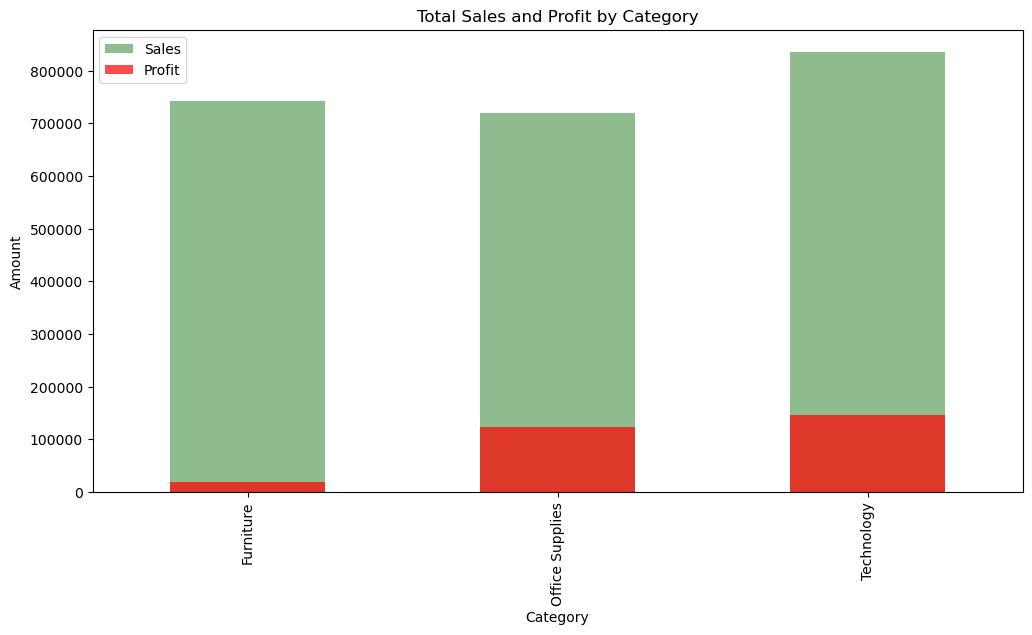

In [19]:
category_sales = d.groupby('Category')['Sales'].sum()
category_profit = d.groupby('Category')['Profit'].sum()

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', label='Sales', color="#8FBC8F")
category_profit.plot(kind='bar', color='red', alpha=0.7, label='Profit')
plt.title('Total Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()
#plt.grid(True)
plt.show()

# Sales and Profit Distribution

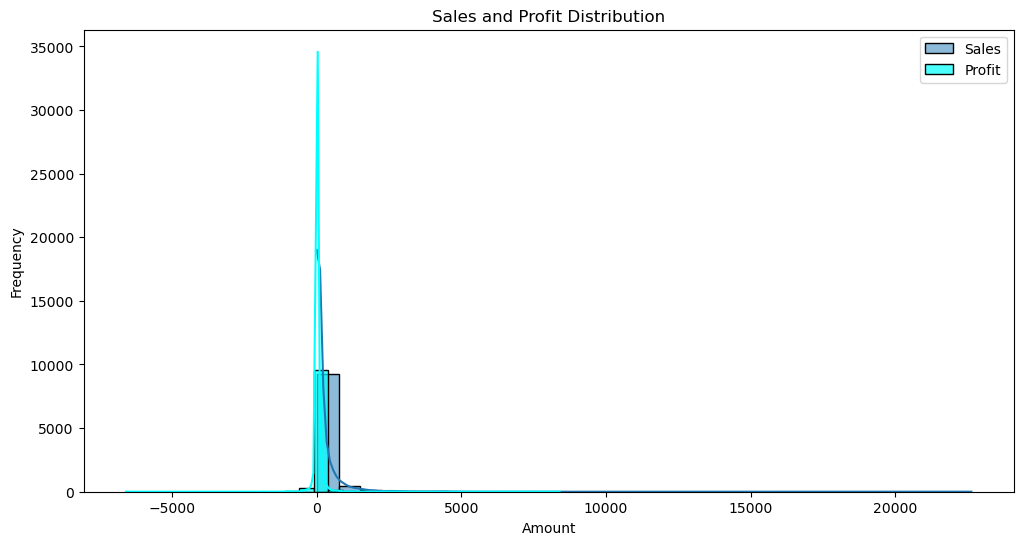

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(d['Sales'], bins=30, kde=True, label='Sales')
sns.histplot(d['Profit'], bins=30, kde=True, color='cyan', alpha=0.7, label='Profit')
plt.title('Sales and Profit Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusion and Recommendations

- **Total Sales:** The total sales for the period analyzed is $2,297,200.86.

- **Total Profit:** The total profit for the period analyzed is $286,397.02.

- **Sales and Profit Trends:** There is an upward/downward trend in sales and profit, with peaks in months April, 
    October, and December.
- **Best-Selling Products:** The top-selling products are "Canon imageCLASS 2200 Advanced Copier" with sales of 61599.824, 
    "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" with sales of 27453.384 
    and "Cisco TelePresence System EX90 Videoconferencing Unit" with sales of 22638.480.
    Focus on promoting these products to boost sales.
- **Most Profitable Products:** The most profitable products are "Canon imageCLASS 2200 Advanced Copier" with a profit of 25199.9280,
    "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" with a profit of 7753.0390,
    and "Hewlett Packard LaserJet 3310 Copier" with a profit of 6983.8836. Focus on these products to maximize profit.
- **Sales and Profit by Category:** Categories Technology, Furniture, and Office supplies contribute significantly to the total sales 
    and profit. Consider expanding the product range in these categories.
- **Sales and Profit Distribution:** The majority of sales and profit are in the range of $0 to $1000, 
    suggesting that most purchases are of lower value, with a few outliers at higher values.

**Recommendations:**
1. Increase marketing efforts for the top-selling and most profitable products and categories.
2. Analyze the periods of peak sales and profit to understand the driving factors and replicate successful strategies.
3. Consider running promotions or discounts to boost sales and profit during slower months.